# Importing Libraries

In [468]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Importing dataset


In [469]:
fi = 'respiratory.xlsx'
df = pd.read_excel (fi)

# Overview of the dataset


In [470]:
df.columns = df.columns.str.replace(' ', '') # to remove white spaces

In [471]:
# To show the all columns
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 85)

In [472]:
df.head(2) # view of first five records

,Rank,NCTNumber,Title,Acronym,Status,StudyResults,Conditions,Interventions,OutcomeMeasures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,FundedBys,StudyType,StudyDesigns,studydesign(final),OtherIDs,StartDate(m),startdate(d),startdate(y),startdate(final)-1,PrimaryCompletionDate(m),primarycompletiondate(m),primarycompletiondate(y),primarycompletionfinal-2,CompletionDate(m),completedate(d),completedate(y),completiondate(final)-3,FirstPosted(m),firstposted(d),firstposted(y),firstpostedfinal-4,ResultsFirstPosted(m),resultsfirstposted(d),resultsfirstposted(y),resultsfirstpostedfinal-5,LastUpdatePosted,Locations,StudyDocuments,URL,noofdays(1-3),noofdays(1-2),noofdays(1-4),noofdays(2-3),noofdays(4-2),noofdays(4-3),noofdays(1-5),noofdays(2-5),noofdays(3-5),noofdays(4-5)
0,3,NCT00951808,Preventing Acute Chest Syndrome by Transfusion...,PROACTIVE,Completed,Has Results,Sickle Cell Disease,Biological: Single blood transfusion|Behaviora...,Acute Chest Syndrome,"HealthCore-NERI|National Heart, Lung, and Bloo...",All,"2 Years and older Â (Child, Adult, Older Adult)",Not Applicable,237,Other|NIH,Interventional,Allocation: Randomized|Intervention Model: Par...,Allocation,668|U10HL083721,1,7,2009,2009-01-07 00:00:00,1,6,2010,6-1-2010,1,7,2010,2010-01-07 00:00:00,8,4,2009,4-8-2009,4,5,2013,5-4-2013,"April 24, 2013","Children's Hospital and Research Center, Oakla...",NaN,https://ClinicalTrials.gov/show/NCT00951808,360,359,207,1,152,153,1528,1169,1168,1981
1,5,NCT02697240,A Phase 1 Study of Continuous Intravenous L-ci...,NaN,Completed,Has Results,Sickle Cell Disease,Drug: Intravenous citrulline,Number of Participants With Adverse Events|Pla...,University of Mississippi Medical Center,All,"6 Years to 50 Years Â (Child, Adult)",Phase 1,4,Other,Interventional,Intervention Model: Single Group Assignment|Ma...,Intervention,2014-0230,1,2,2016,2016-01-02 00:00:00,1,4,2017,4-1-2017,1,4,2017,2017-01-04 00:00:00,3,3,2016,3-3-2016,4,17,2019,17-4-2019,"June 25, 2019","University of Mississippi Medical Center, Jack...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT02697240,362,362,61,0,301,301,1185,823,823,1987


In [473]:
dataset=df[['FundedBys','noofdays(1-2)','noofdays(4-3)','Phases','noofdays(1-3)','Enrollment']]

In [474]:
dataset.head(10) # view of last five records

,FundedBys,noofdays(1-2),noofdays(4-3),Phases,noofdays(1-3),Enrollment
0,Other|NIH,359,153,Not Applicable,360,237
1,Other,362,301,Phase 1,362,4
2,Other,1308,1911,Phase 3,2302,40
3,Other|Industry,1079,1024,Phase 2,1079,33
4,Other,1441,1065,Not Applicable,1441,12
5,Other,1803,1878,Phase 2|Phase 3,1804,43
6,Other|NIH,1392,1350,Phase 2,1444,170
7,Other|NIH,355,697,Phase 1,715,9
8,Other|NIH,1074,895,Phase 2,1081,90
9,Other|NIH,1074,1392,Phase 2,1404,60


In [475]:
dataset.info() # data type information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29526 entries, 0 to 29525
Data columns (total 6 columns):
FundedBys        29526 non-null object
noofdays(1-2)    29526 non-null int64
noofdays(4-3)    29526 non-null int64
Phases           29526 non-null object
noofdays(1-3)    29526 non-null int64
Enrollment       29526 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [476]:
dataset.describe() # statistical information getting of non-object variable

,noofdays(1-2),noofdays(4-3),noofdays(1-3),Enrollment
count,29526.000000,29526.000000,29526.000000,29526.000000
mean,830.654813,763.596153,1026.450721,463.386507
std,723.954756,1088.248647,927.189282,2658.376346
min,0.000000,-9124.000000,0.000000,1.000000
25%,357.000000,160.000000,359.000000,40.000000
50%,717.000000,579.000000,722.000000,107.000000
75%,1084.000000,1237.000000,1440.000000,351.000000
max,5168.000000,6275.000000,7554.000000,87665.000000


In [477]:
dataset.describe(include=['O']) # statistical information of objects type variable

,FundedBys,Phases
count,29526,29526
unique,27,8
top,Industry,Phase 2
freq,17586,9264


# Exploratory Data analysis


In [478]:
dataset.isna().sum() # checking missing values

FundedBys        0
noofdays(1-2)    0
noofdays(4-3)    0
Phases           0
noofdays(1-3)    0
Enrollment       0
dtype: int64

In [479]:
# find the unique value count
for i in dataset.columns:
    print(i + "\t" + str(len(dataset[i].unique())))

FundedBys	27
noofdays(1-2)	1009
noofdays(4-3)	2052
Phases	8
noofdays(1-3)	1111
Enrollment	1041


In [480]:
# find unique values of each column
for i in dataset.columns:
    print("Unique value of:>>> {} ({})\n{}\n".format(i, len(dataset[i].unique()), dataset[i].unique()))

Unique value of:>>> FundedBys (27)
['Other|NIH' 'Other' 'Other|Industry' 'Industry' 'Other|NIH|Industry'
 'Industry|NIH' 'Other|U.S. Fed|NIH|Industry' 'Industry|Other'
 'Other|U.S. Fed' 'U.S. Fed' 'Other|Industry|NIH' 'U.S. Fed|Other'
 'Industry|NIH|Other' 'NIH|Industry' 'NIH|Other' 'NIH'
 'Other|U.S. Fed|Industry' 'Other|Industry|U.S. Fed' 'Industry|U.S. Fed'
 'Industry|Other|U.S. Fed' 'Industry|Other|NIH' 'Industry|U.S. Fed|Other'
 'U.S. Fed|Industry' 'NIH|Other|Industry' 'NIH|U.S. Fed'
 'Other|U.S. Fed|NIH' 'NIH|U.S. Fed|Other']

Unique value of:>>> noofdays(1-2) (1009)
[ 359  362 1308 ...  323  416  409]

Unique value of:>>> noofdays(4-3) (2052)
[  153   301  1911 ...   437  1406 -1871]

Unique value of:>>> Phases (8)
['Not Applicable' 'Phase 1' 'Phase 3' 'Phase 2' 'Phase 2|Phase 3'
 'Phase 1|Phase 2' 'Phase 4' 'Early Phase 1']

Unique value of:>>> noofdays(1-3) (1111)
[ 360  362 2302 ...  986  323  497]

Unique value of:>>> Enrollment (1041)
[ 237    4   40 ...  387 1300  692]



In [481]:
##one_hot = pd.get_dummies(dataset["studydesign(final)"])
# Drop column B as it is now encoded

##dataset = dataset.drop(["studydesign(final)"],axis = 1)
# Join the encoded df
##dataset = dataset.join(one_hot)
##dataset.head(2)

In [482]:
Phases = pd.get_dummies(dataset["Phases"])
# Drop column B as it is now encoded
dataset = dataset.drop(["Phases"],axis = 1)
# Join the encoded df
dataset = dataset.join(Phases)
dataset.head(2)

,FundedBys,noofdays(1-2),noofdays(4-3),noofdays(1-3),Enrollment,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4
0,Other|NIH,359,153,360,237,0,1,0,0,0,0,0,0
1,Other,362,301,362,4,0,0,1,0,0,0,0,0


In [483]:
dataset.head(2)

,FundedBys,noofdays(1-2),noofdays(4-3),noofdays(1-3),Enrollment,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4
0,Other|NIH,359,153,360,237,0,1,0,0,0,0,0,0
1,Other,362,301,362,4,0,0,1,0,0,0,0,0


In [484]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
dataset["FundedBys"]= label_encoder.fit_transform(dataset["FundedBys"]) 
#dataset["Phases"]= label_encoder.fit_transform(dataset["Phases"]) 

In [485]:
dataset.head()

,FundedBys,noofdays(1-2),noofdays(4-3),noofdays(1-3),Enrollment,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4
0,18,359,153,360,237,0,1,0,0,0,0,0,0
1,14,362,301,362,4,0,0,1,0,0,0,0,0
2,14,1308,1911,2302,40,0,0,0,0,0,0,1,0
3,15,1079,1024,1079,33,0,0,0,0,1,0,0,0
4,14,1441,1065,1441,12,0,1,0,0,0,0,0,0


In [486]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29526 entries, 0 to 29525
Data columns (total 13 columns):
FundedBys          29526 non-null int32
noofdays(1-2)      29526 non-null int64
noofdays(4-3)      29526 non-null int64
noofdays(1-3)      29526 non-null int64
Enrollment         29526 non-null int64
Early Phase 1      29526 non-null uint8
Not Applicable     29526 non-null uint8
Phase 1            29526 non-null uint8
Phase 1|Phase 2    29526 non-null uint8
Phase 2            29526 non-null uint8
Phase 2|Phase 3    29526 non-null uint8
Phase 3            29526 non-null uint8
Phase 4            29526 non-null uint8
dtypes: int32(1), int64(4), uint8(8)
memory usage: 1.2 MB


# Separating the Dependent(Target) and Independent (Observed)variables


In [487]:
dataset.shape

(29526, 13)

In [488]:
y=dataset.loc[:,['noofdays(1-3)']].values

In [489]:
y

array([[ 360],
       [ 362],
       [2302],
       ...,
       [ 366],
       [ 404],
       [ 388]], dtype=int64)

In [490]:
X=dataset.drop('noofdays(1-3)',axis=1)

In [491]:
X.values

array([[  18,  359,  153, ...,    0,    0,    0],
       [  14,  362,  301, ...,    0,    0,    0],
       [  14, 1308, 1911, ...,    0,    1,    0],
       ...,
       [   0,  366,  362, ...,    0,    1,    0],
       [   0,  404,  391, ...,    0,    1,    0],
       [   0,  372,  383, ...,    0,    1,    0]], dtype=int64)

# Creating training part and Test part

In [492]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [493]:
X_test.shape, y_test.shape, y_train.shape, X_train.shape

((8858, 12), (8858, 1), (20668, 1), (20668, 12))

# Linear Regression Model


In [494]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [495]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[115.76234212]
[[ 3.03936725e+00  7.36422326e-01  3.54017466e-01 -2.34915326e-03
   6.79277645e+00 -1.31962406e+01  1.32188797e+01  1.31177291e+01
   8.45641575e+00 -3.28209030e+01  5.73199037e+01 -5.28885611e+01]]


In [496]:
y_pred = regressor.predict(X_test)

In [497]:

regressor.score(X_test,y_test)

0.8409538690608281

In [498]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 235.37778515204295
Mean Squared Error: 138204.10495384925
Root Mean Squared Error: 371.75812695064144


In [499]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1073,935.971583
1,2920,1920.284222
2,808,699.088149
3,2,-870.541736
4,713,848.076469
...,...,...
8853,224,357.045873
8854,720,835.472757
8855,5,54.841368
8856,1809,1579.396134


In [543]:
y_pred.mean()

1023.1647940465558

In [546]:
#Scatter index
SI= (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/y_test.mean()
SI
#since SI is <1 our estimations are acceptable

0.3622251605801376

Text(0, 0.5, 'Sales')

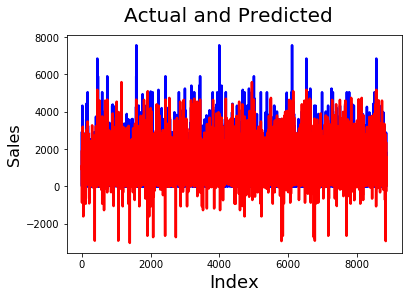

In [500]:
#Actual vs Predicted
c = [i for i in range(1,8859,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

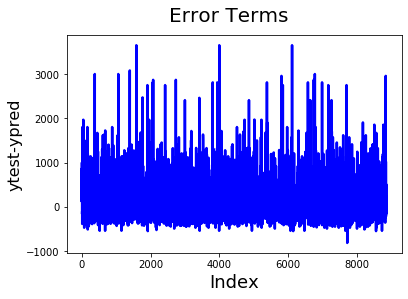

In [501]:
# Error terms
c = [i for i in range(1,8859,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [504]:
# import statsmodels.api as sm
import statsmodels.api as sm
X_train_final = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     9679.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:47:13   Log-Likelihood:            -1.5171e+05
No. Observations:               20668   AIC:                         3.034e+05
Df Residuals:                   20656   BIC:                         3.035e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             102.8999      6.435     

In [521]:
new_input ='coviddata.csv'
ds = pd.read_csv(new_input)

In [522]:
ds.columns = ds.columns.str.replace(' ', '') # to remove white spaces

In [523]:
ds.head(2) # view of first five records

,Rank,NCTNumber,Title,Acronym,Status,StudyResults,Conditions,Interventions,OutcomeMeasures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,FundedBys,StudyType,StudyDesigns,Studydesign(final),OtherIDs,StartDate(m),startdate(d),startdate(y),startdate(final)-1,PrimaryCompletionDate(m),primarycompletion(d),primarycompletion(y),primarycompletionfinal-2,CompletionDate(m),completiondate(d),completiondate(y),Completiondate(final)-3,FirstPosted(m),firstposted(d),firstposted(y),firstpostedfinal-4,ResultsFirstPosted,LastUpdatePosted,Locations,StudyDocuments,URL,noofdays(1-3),noofdays(1-2),noofdays(1-4),noofdays(2-3),noofdays(4-2),noofdays(4-3)
0,1,NCT04333550,Application of Desferal to Treat COVID-19,NaN,Recruiting,No Results Available,COVID-19,Drug: Deferoxamine,Mortality rate|change in patients clinical man...,Kermanshah University of Medical Sciences,All,"3 Years to 99 Years (Child, Adult, Older Adult)",Phase 1|Phase 2,50,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,Allocation,1398.1224,1,4,2020,04-01-2020,1,9,2020,09-01-2020,1,3,2021,03-01-2021,4,3,2020,03-04-2020,NaN,"April 6, 2020","Regenerative Medicine Research Center, Kermans...",NaN,https://ClinicalTrials.gov/show/NCT04333550,359,5,89,354,-84,270
1,2,NCT04336904,Clinical Study To Evaluate The Performance And...,NaN,"Active, not recruiting",No Results Available,COVID-19,Drug: Favipiravir|Other: Placebo,Time from randomization to clinical recovery|T...,Giuliano Rizzardini|ASST Fatebenefratelli Sacco,All,"18 Years to 75 Years (Adult, Older Adult)",Phase 3,100,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,Allocation,HS216C17-PHASE III,3,25,2020,25-03-2020,1,7,2020,07-01-2020,1,7,2020,07-01-2020,4,7,2020,07-04-2020,NaN,"April 8, 2020","Asst Fatebenefratelli Sacco, Milano, Italy",NaN,https://ClinicalTrials.gov/show/NCT04336904,-78,-78,12,0,-90,-90


In [524]:
ds1=ds[['FundedBys','noofdays(1-2)','noofdays(4-3)','Phases','Enrollment']]

In [525]:
ds1.head()

,FundedBys,noofdays(1-2),noofdays(4-3),Phases,Enrollment
0,Other,5,270,Phase 1|Phase 2,50
1,Other,-78,-90,Phase 3,100
2,Other,720,711,Not Applicable,10000000
3,Other,357,357,Not Applicable,3170
4,Other,120,179,Phase 2|Phase 3,550


In [526]:
#one_hot = pd.get_dummies(ds1["Studydesign(final)"])
# Drop column B as it is now encoded

# Join the encoded df



In [527]:
#one_hot.head()

In [528]:
#ds1 = ds1.drop(["Studydesign(final)"],axis = 1)

In [529]:
#ds1 = ds1.join(one_hot)

In [530]:
ds1.head(2)

,FundedBys,noofdays(1-2),noofdays(4-3),Phases,Enrollment
0,Other,5,270,Phase 1|Phase 2,50
1,Other,-78,-90,Phase 3,100


In [531]:
Phases = pd.get_dummies(ds1["Phases"])
# Drop column B as it is now encoded
ds1 = ds1.drop(["Phases"],axis = 1)
# Join the encoded df
ds1 = ds1.join(Phases)
ds1.head(2)

,FundedBys,noofdays(1-2),noofdays(4-3),Enrollment,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4
0,Other,5,270,50,0,0,0,1,0,0,0,0
1,Other,-78,-90,100,0,0,0,0,0,0,1,0


In [532]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
ds1["FundedBys"]= label_encoder.fit_transform(ds1["FundedBys"]) 
#dataset["Phases"]= label_encoder.fit_transform(dataset["Phases"]) 

In [533]:
ds1.head()

,FundedBys,noofdays(1-2),noofdays(4-3),Enrollment,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4
0,3,5,270,50,0,0,0,1,0,0,0,0
1,3,-78,-90,100,0,0,0,0,0,0,1,0
2,3,720,711,10000000,0,1,0,0,0,0,0,0
3,3,357,357,3170,0,1,0,0,0,0,0,0
4,3,120,179,550,0,0,0,0,0,1,0,0


In [534]:
dataset.head()

,FundedBys,noofdays(1-2),noofdays(4-3),noofdays(1-3),Enrollment,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4
0,18,359,153,360,237,0,1,0,0,0,0,0,0
1,14,362,301,362,4,0,0,1,0,0,0,0,0
2,14,1308,1911,2302,40,0,0,0,0,0,0,1,0
3,15,1079,1024,1079,33,0,0,0,0,1,0,0,0
4,14,1441,1065,1441,12,0,1,0,0,0,0,0,0


In [535]:
my_prediction=regressor.predict(ds1)

In [537]:
my_prediction.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [538]:
#actual_value=ds[['noofdays(1-3)']]

In [539]:
actual_value=ds.loc[:,['noofdays(1-3)']].values

In [540]:
actual_value.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [541]:
ds3= pd.DataFrame({'actual_value': actual_value.flatten(), 'Predicted': my_prediction.flatten()})
ds3

,actual_value,Predicted
0,359,237.147543
1,-78,92.662919
2,720,-22597.917944
3,357,493.524393
4,150,242.507312
...,...,...
399,900,1079.842674
400,55,220.016225
401,1260,688.065600
402,85,183.502355


ds3.to_csv('C:\Users\indir\OneDrive\Desktop\predictedvalues.csv')

In [542]:
ds3.to_csv("C:\\Users\indir\OneDrive\Desktop\predictedvalues.csv")

In [ ]:
X_test.head()

In [ ]:
ds1.head()